# Import

In [6]:
import ccxt
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import SpectralClustering, KMeans

# Give the coins historical data

In [7]:
#coins = "BTC", "ETH", "BNB", "XRP", "ADA", "DOGE", "SOL", "MATIC", "TRX", "LTC", "DOT", "AVAX", "SHIB", "UNI", "ATOM", "LINK", "XMR", "ETC", "BCH", "ICP", "FIL", "XLM", "HBAR", "VET", "SAND", "QNT", "MANA", "ALGO", "EGLD", "AAVE"

In [20]:
coins = "BTC", "ETH", "DOGE", "TRX", "BNB", "MATIC", "FTM", "SHIB", "SOL", 

In [9]:
coins = "BTC", "ETH", "DOGE", "LTC", "XRP", "TRX", "ADA", "BNB", "MATIC", "FTM", "SHIB", "SOL", 

In [21]:
binance = ccxt.binance()
timeframe = '1d'  

In [22]:
def get_data(coin, base, timeframe):
    df = binance.fetch_ohlcv(f'{coin}/{base}', timeframe, limit=500)
    df = pd.DataFrame(df, columns=['Timestamp', 'Open', 'High', 'Low', 'Close', 'Volume'])
    df['Timestamp'] = pd.to_datetime(df['Timestamp'], unit='ms')
    df.set_index('Timestamp', inplace=True)
    return df

In [23]:
data = {}
for coin in coins:    
    data[coin] = get_data(coin, "USDT", timeframe)    

In [24]:
corr_data = {}
for coin in coins:    
    corr = []
    d1 = data[coin]['Close']
    for coin2 in coins:    
        d2 = data[coin2]['Close']
        corr.append(d1.corr(d2))        
    corr_data[coin] = corr    

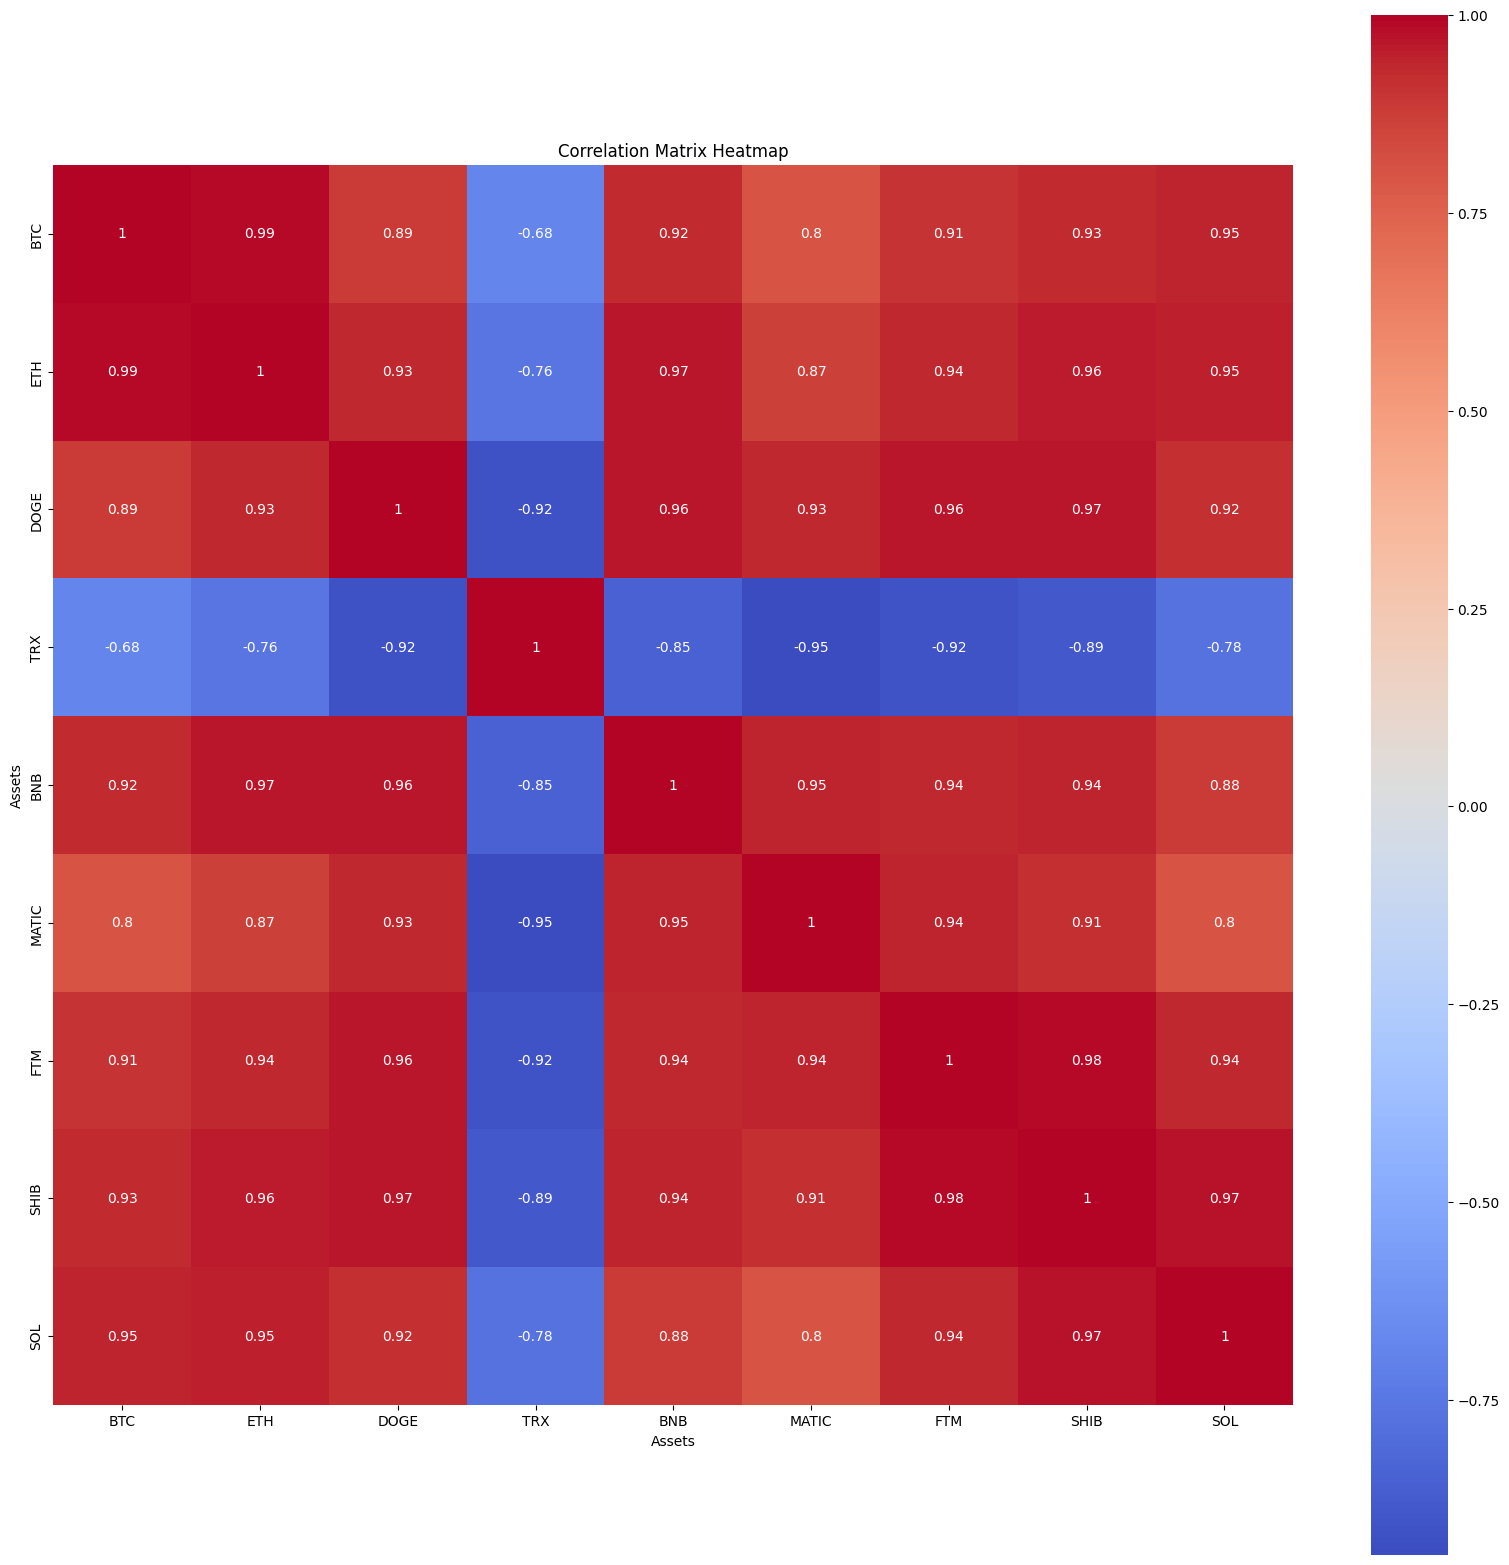

In [25]:
plt.figure(figsize=(20,20))
df = pd.DataFrame(corr_data)
df.index = coins
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', square=True)
plt.xlabel('Assets')
plt.ylabel('Assets')
plt.title('Correlation Matrix Heatmap')
plt.show()

# Select 3 point with max distance

In [26]:
def select_max_distance_points(distance_matrix, selection):    
    def permutations(arr, n, permutation=[]):
        if len(permutation) == n:
            yield tuple(permutation)
        else:
            for i in range(len(arr)):
                yield from permutations(arr[:i] + arr[i+1:], n, permutation + [arr[i]])
                
    def distances(permut):       
        dist = 0
        for i in range(len(permut)-1):
            for j in range(i+1, len(permut)):
                coin1 = permut[i]
                coin2 = permut[j]                     
                dist += distance_matrix[coin1][coin2]
        return dist

    permut_list = list(permutations(coins, selection))
    max_distance = 0
    best_points = None
    for permut in permut_list:
        dist = distances(permut)
        if(dist > max_distance):
            max_distance = dist
            best_points = permut
    print(f"max distance in average is {max_distance / math.factorial(selection)}")
    return best_points


distance_matrix = (correlation_matrix - 1).abs()
points = select_max_distance_points(distance_matrix, 4)
print(points)

max distance in average is 0.24983073295644806
('DOGE', 'MATIC', 'SOL', 'TRX')


# Visualize selected points

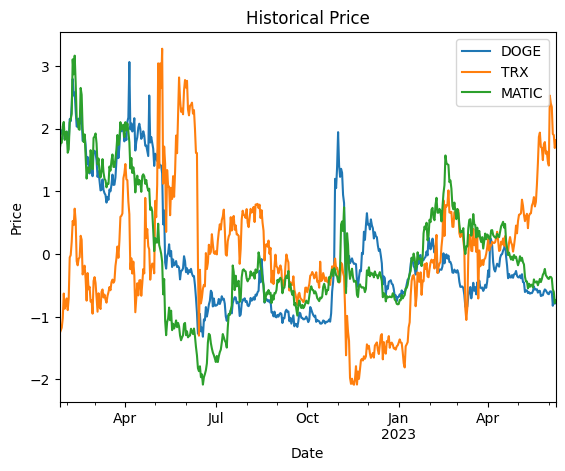

In [35]:
for point in points:    
    d = data[point]['Close']
    d = (d - d.mean()) / d.std()
    d.plot()
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend(points)
plt.title('Historical Price')
plt.show()